In [57]:
from PIL import Image
import glob
import numpy as np

In [58]:
no_of_images = 100

In [59]:
images = [Image.open(img) for img in glob.glob("mnist_selected_2/*.png")]

In [60]:
size = np.array(images[0]).shape

In [61]:
size

(64, 64)

In [62]:
X = np.zeros([no_of_images, size[0]*size[1]])

for i in range(0,no_of_images):
    X[i] = np.array(images[i]).flatten()

In [63]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
X.shape

(100, 4096)

In [65]:
U, s, V = np.linalg.svd(X)

In [66]:
U.shape

(100, 100)

In [67]:
s.shape

(100,)

In [68]:
V.shape

(4096, 4096)

In [69]:
S = np.zeros([X.shape[0], X.shape[1]])

In [70]:
S[0:X.shape[0], 0:X.shape[0]] = np.diag(s)

In [71]:
def reconstruct(n_components):
    recon_loss = []
    recon = []
    for n in n_components:
        B = np.uint8(U.dot(S[:,:n].dot(V[:n,:])))
        recon_loss.append(np.sum(s[n:]))
        for i in range(0,no_of_images):
            arr = B[i]
            arr = arr.reshape([64,64])
            recon.append(Image.fromarray(arr))
    return recon, recon_loss    

In [92]:
n_components = [i for i in range(0,200+1)]

In [93]:
recon, recon_loss = reconstruct(n_components)

In [94]:
import matplotlib.pyplot as plt

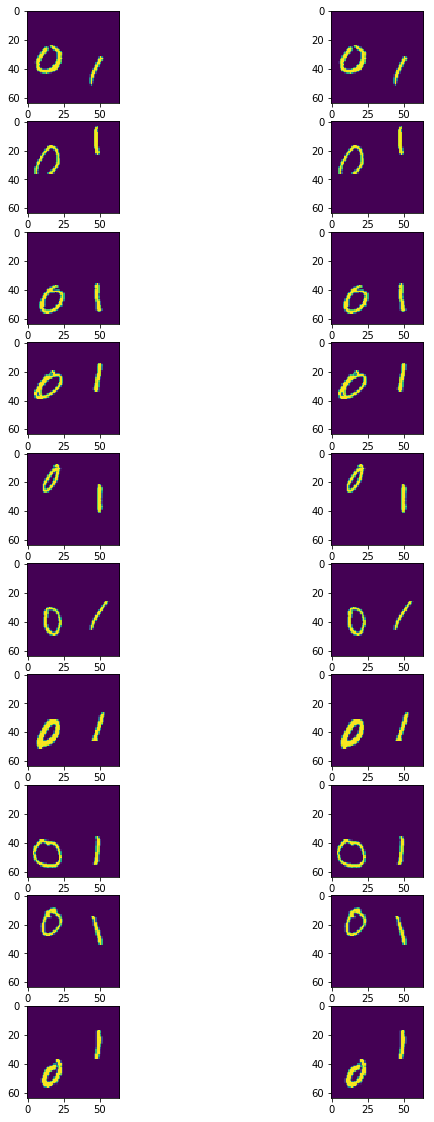

In [98]:
fig = plt.figure(figsize=(10,20))
count = 10
for i in range(0,count):
    subfig = fig.add_subplot(count,2,2*i+1)
    subfig.imshow(images[i])
    subfig = fig.add_subplot(count,2,2*i+2)
    subfig.imshow(recon[10000+i])

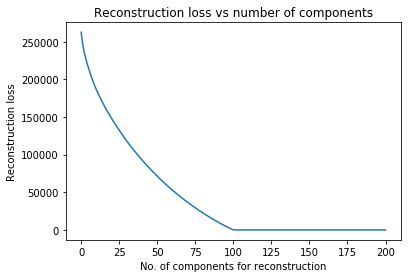

In [99]:
plt.plot(n_components, recon_loss) 
  
plt.xlabel('No. of components for reconstruction')
plt.ylabel('Reconstruction loss') 

plt.title('Reconstruction loss vs number of components') 

plt.show() 

In [100]:
s

array([15540.27189582, 11359.69772922,  7870.419266  ,  7367.3921641 ,
        6622.08210261,  6278.23758768,  5971.24820213,  5658.45092583,
        4886.96281519,  4795.68622737,  4472.95427112,  4273.41668307,
        4083.81388341,  4015.96121857,  3847.81306122,  3714.87568483,
        3547.22499028,  3463.09865998,  3393.400539  ,  3375.0611647 ,
        3328.64726934,  3162.14889648,  3084.22929982,  3027.79547504,
        3008.62630347,  2977.27936499,  2947.07434743,  2868.86073447,
        2839.62748972,  2778.5453616 ,  2715.20557146,  2674.01561668,
        2618.15545594,  2577.14980713,  2517.3190972 ,  2484.72543178,
        2425.44058428,  2398.82394574,  2350.48340401,  2316.31063285,
        2301.42181263,  2293.24699436,  2213.64774603,  2196.046241  ,
        2178.88981304,  2106.60466723,  2098.66587856,  2046.29026513,
        2038.68683572,  2020.96973429,  2019.60257792,  1977.22658368,
        1966.77268031,  1928.90540879,  1851.93291621,  1822.80043365,
      